### Presenting the data and preparing it for training the classifier using XGBoost version 2






In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Mental_health.csv")

In [3]:
df.head()

,Age,Feeling sad or Tearful,Irritable towards partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling anxious,Feeling of guilt,Problems of bonding
0,18-30,Yes,Yes,Two or more days a week,Yes,Yes,Yes,No,Yes
1,30-40,Yes,No,No,Yes,Yes,No,Yes,Yes
2,18-30,Yes,No,Yes,Yes,Yes,Yes,No,Sometimes
3,18-30,Yes,Yes,Yes,Yes,No,Yes,Maybe,No
4,30-40,Yes,No,Two or more days a week,Yes,No,Yes,No,Yes


#### Replies with incomplete data removed

In [4]:
df = df.dropna()

#### "Timestamp.column" removed



In [5]:
df.head()

,Age,Feeling sad or Tearful,Irritable towards partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling anxious,Feeling of guilt,Problems of bonding
0,18-30,Yes,Yes,Two or more days a week,Yes,Yes,Yes,No,Yes
1,30-40,Yes,No,No,Yes,Yes,No,Yes,Yes
2,18-30,Yes,No,Yes,Yes,Yes,Yes,No,Sometimes
3,18-30,Yes,Yes,Yes,Yes,No,Yes,Maybe,No
4,30-40,Yes,No,Two or more days a week,Yes,No,Yes,No,Yes


#### Data mapping

The data has been mapped to make it easier to handle later in classifier training

In [6]:
age_mapping = {'25-30': 1,
               '30-35': 2,
               '35-40': 3,
               '40-45': 4,
               '45-50': 5
               }
Irritable_mapping = {
    'Yes': 2,
    'No': 0,
    'Sometimes': 1
}
Conc_mapping = {
    'Yes': 2,
    'No': 0,
    'Often': 1
}
Anxious_mapping = {
    'Yes': 1,
    'No': 0
}
Bonding_mapping = {
    'Yes': 2,
    'No': 0,
    'Sometimes': 1
}

Feeling_mapping = {
    'Yes':2,
    'Sometimes':1,
    'No':0,
}
Sleeping_mapping = {
    'Yes':2,
    'Two or more days a week':1,
    'No':0,
}

Overeating_mapping = {
    'Yes':2,
    'No':1,
    'Not at all':0,
}

Guilt_mapping = {
    'Yes':2,
    'Maybe':1,
    'No':0,
}


df['Age'] = df['Age'].map(age_mapping)
df['Irritable towards partner'] = df['Irritable towards partner'].map(Irritable_mapping)
df['Problems concentrating or making decision'] = df['Problems concentrating or making decision'].map(Conc_mapping)
df['Feeling anxious'] = df['Feeling anxious'].map(Anxious_mapping)
df['Problems of bonding '] = df['Problems of bonding '].map(Bonding_mapping)
df['Feeling sad or Tearful'] = df['Feeling sad or Tearful'].map(Feeling_mapping)
df['Trouble sleeping at night'] = df['Trouble sleeping at night'].map(Sleeping_mapping)
df['Overeating or loss of appetite'] = df['Overeating or loss of appetite'].map(Overeating_mapping)
df['Feeling of guilt'] = df['Feeling of guilt'].map(Guilt_mapping)


#### Checked how the 'Not interested to say' data from the 'Suicide attempt' column was mapped

This data has been marked as NaN (Not a Number). As noted in the following steps, this was the best solution for the "Not interested to say" response because its ambiguity made it difficult to assign a specific value.

In [7]:
df.iloc[9]

Age                                          4.0
Feeling sad or Tearful                       1.0
Irritable towards partner                    2.0
Trouble sleeping at night                    1.0
Problems concentrating or making decision    0.0
Overeating or loss of appetite               2.0
Feeling anxious                              1.0
Feeling of guilt                             0.0
Problems of bonding                          1.0
Name: 9, dtype: float64

#### Splitting the data into test and training values



In [8]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Feeling anxious']).values

y = df['Feeling anxious'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)


#### Classifier Science

The entire process includes preparing data, training the model, assessing the importance of features, and evaluating the model on test data. The bar chart provides a visual interpretation of the importance of each feature, which can be useful in understanding which features have the greatest impact on predicting the 'Feeling anxiety' target variable. The accuracy of the model and the F1 test result were also demonstrated.

In [9]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


 1) Feeling of guilt               0.298610
 2) Irritable towards partner      0.136112
 3) Feeling sad or Tearful         0.122072
 4) Problems of bonding            0.106075
 5) Trouble sleeping at night      0.105553
 6) Problems concentrating or making decision 0.096681
 7) Overeating or loss of appetite 0.071988
 8) Age                            0.062909


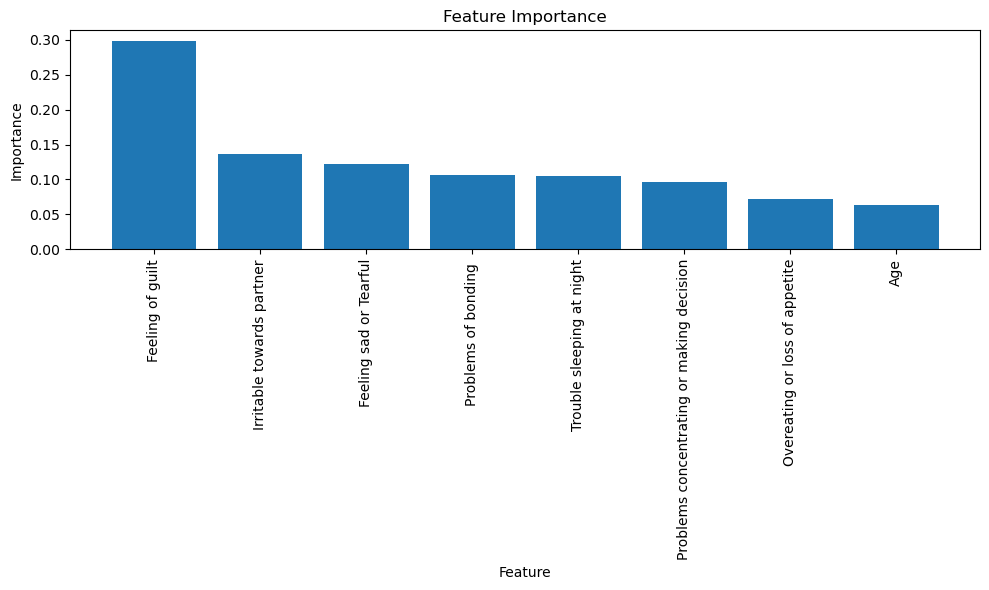

Model Accuracy on Test Data: 0.9621
Model F1 Score on Test Data: 0.9705


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

feat_labels = df.drop(columns=['Feeling anxious']).columns


X = df.drop(columns=['Feeling anxious']).values


y = df['Feeling anxious'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

xgb_model = xgb.XGBClassifier(n_estimators=1000, random_state=1, n_jobs=-1)

xgb_model.fit(X_train, y_train)


importances = xgb_model.feature_importances_
indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), feat_labels[indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

y_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy on Test Data: {accuracy:.4f}')

from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred)
print(f'Model F1 Score on Test Data: {f1:.4f}')

In [11]:
input_data = (5.0 ,1 ,1 ,1 ,0 ,1 ,1 ,0)
#Yes 	No 	No 	Yes 	Yes 	
# Change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the numpy array as we are predicting for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Predict using the classifier
prediction = xgb_model.predict(input_data_reshaped)



if prediction[0] == 0:  # Accessing the first element directly
    print('Congrats! You are a fit mother, you just need to maintain it.')
else:
    print('The patient requires happy pills to stay healthy')


Congrats! You are a fit mother, you just need to maintain it.


In [12]:
# for one the test case ->1.0 ,1 ,0 ,0 ,1 ,1 ,1,2
# for zero the test case ->5.0 ,1 ,1 ,1 ,0 ,1 ,1 ,0
df

,Age,Feeling sad or Tearful,Irritable towards partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling anxious,Feeling of guilt,Problems of bonding
0,NaN,2,2,1,2,2,1,0,2
1,NaN,2,0,0,2,2,0,2,2
2,NaN,2,0,2,2,2,1,0,1
3,NaN,2,2,2,2,1,1,1,0
4,NaN,2,0,1,2,1,1,0,2
...,...,...,...,...,...,...,...,...,...
1498,4.0,2,0,1,0,1,1,1,1
1499,1.0,1,0,0,1,1,1,1,2
1500,1.0,0,1,1,0,1,0,2,0
1501,1.0,0,1,2,1,1,1,0,0
